# start2impact University | Progetto Advanced Analytics

Ti diamo il benvenuto nel notebook del progetto del Corso Advanced Analytics!

Prima di tutto bisogna importare una serie di librerie core, che saranno quelle principali per rispondere alle domande del progetto:

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

Per usare il tuo Google Drive con Colab, bisogna montarlo tramite il seguente comando. Dovrebbe chiederti l'accesso tramite il tuo account Google, concediglielo e seleziona tutte le spunte disponibili.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dopodiché puoi partire con l'importazione del dataset **supermarket sales**, il primo che ti servirà: dovresti averlo già uploadato nel tuo Drive, inserisci la location dove lo hai salvato andando a sostituire il placeholder *{PATH_AL_FILE_SUL_TUO_DRIVE}*, così da importarlo nell'ambiente di lavoro:

In [3]:
regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/Start2impact/Data Analysis/8 - Advanced Analytics/progetto/supermarket_sales.csv', encoding='windows-1254')

# Esplorazione del dataset

**In questa breve sezione andrai a visualizzare il dataset in forma tabellare**, così da averne una rappresentazione più intuitiva e comprendere meglio con che tipologia di dato hai a che fare. Per semplicità si mostrano solo le prime 100 occorrenze.

In [4]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Vai quindi a vedere più nel dettaglio quali sono i metadati principali delle colonne del dataset:

In [5]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Da questo puoi già vedere che non ci sono valori nulli, per cui non dovrai usare nessuna strategia per fillarli, altri valori invece sono categorici e quindi bisognerà usare una strategia per codificarli; insomma hai già un po' di informazioni di massima sul dato!
Alcune colonne risultano poco utili ai fini dell'analisi per la predizione e quindi vanno semplicemente eliminate, come per esempio l'ID della fattura, la data della vendita, l'orario e un altro paio:

In [6]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

Puoi quindi vedere che alcune colonne sono state rimosse e adesso hai solo quelle che effettivamente sono utili ai fini dello sviluppo del modello:

In [7]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [8]:
regression_dataset.head(100)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...
95,A,Yangon,Normal,Male,Electronic accessories,97.16,1,Ewallet,4.8580,7.2
96,B,Mandalay,Normal,Male,Health and beauty,87.87,10,Ewallet,43.9350,5.1
97,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,Cash,3.7350,4.1
98,A,Yangon,Normal,Male,Food and beverages,52.75,3,Ewallet,7.9125,9.3


# Media, mediana, moda e deviazione standard

Si parte con un esercizio molto semplice, in cui ti chiedo di **calcolare usando numpy la media, la mediana e la moda della colonna su cui andrai a fare predizioni (la label), ovvero Rating**. La colonna "Rating" dà una valutazione alla transazione in base alla redditività della stessa e quindi ti dice quanto è stata proficua la stessa per la catena di supermercati.
Questo ti darà una prima idea di sintesi sui rating assegnati ai vari ordini:

In [9]:
# codice per calcolare la media, mediana e moda della label "Rating"

#media
mean_rating = np.mean(regression_dataset['Rating']).round(2)
#mediana
median_rating = np.median(regression_dataset['Rating']).round(2)
#moda
mode_rating = stats.mode(regression_dataset['Rating'])

print(f"Media: {mean_rating}")
print(f"Mediana: {median_rating}")
print(f"Moda: {mode_rating}")

Media: 6.97
Mediana: 7.0
Moda: ModeResult(mode=6.0, count=26)


Come hai visto durante il Corso, la **deviazione** è una importantissima misura di "sparsità" dei dati, ed è una informazione che è molto utile da ottenere sulla label. Ti chiedo quindi di calcolarla, sempre usando Numpy:

In [10]:
# codice per calcolare la deviazione standard della label "Rating"

std_rating = round(np.std(regression_dataset['Rating']),2)
print(f"Deviazione Standard: {std_rating}")

Deviazione Standard: 1.72


# Come sono distribuiti i valori della label

A questo punto andiamo a vedere come sono graficamente distribuiti i dati:

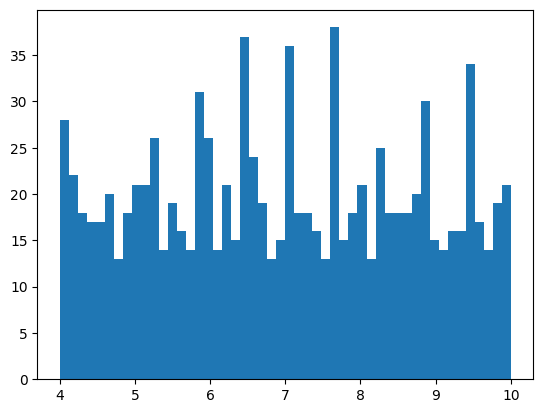

In [11]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

Come puoi vedere, la distribuzione dei rating è più o meno uniforme e non c'è skewness.

Il discorso è invece diverso per l'utile lordo:

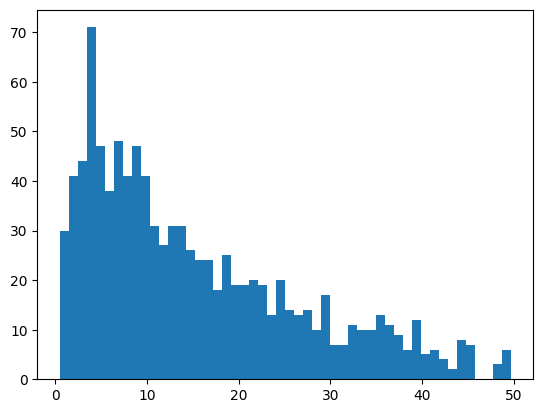

In [12]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

Come puoi vedere, qui la skewness c'è eccome e la maggioranza degli ordini sembra avere un income lordo basso.
Qual è, quindi, il valore di questa skewness esattamente? Tocca a te scoprirlo nella prossima cella!

Un piccolo consiglio: farlo con Numpy non è il modo più semplice!

In [13]:
# Codice per calcolare la skewness del gross income

skewness_gross_income = round(scipy.stats.skew(regression_dataset['gross income']),2)
print(f"Skewness: {skewness_gross_income}")

Skewness: 0.89


# Encoding delle variabili categoriche

Come avrai sicuramente notato, ci sono delle variabili (come "Branch", "City", "Customer type", "Gender", "Product line" e "Payment") che non sono numeriche e che quindi non possono essere direttamente masticate dagli algoritmi che andrai a utilizzare più tardi.
Ricordi le **tecniche per effettuarne l'enconding**? Questo è il momento di usarle per trasformarle in vettori!

In [14]:
# codice per effettuare l'enconding delle variabili categoriche

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

print("Mappatura delle variabili:")
for column in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    unique_values = regression_dataset[column].unique()
    mapping = dict(zip(unique_values, label_encoder.fit_transform(unique_values)))
    print(f"\n{column}")
    for original_value, encoded_value in mapping.items():
        print(f"{original_value}: {encoded_value}")


for column in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
  regression_dataset[column] = label_encoder.fit_transform(regression_dataset[column])

Mappatura delle variabili:

Branch
A: 0
C: 2
B: 1

City
Yangon: 2
Naypyitaw: 1
Mandalay: 0

Customer type
Member: 0
Normal: 1

Gender
Female: 0
Male: 1

Product line
Health and beauty: 3
Electronic accessories: 0
Home and lifestyle: 4
Sports and travel: 5
Food and beverages: 2
Fashion accessories: 1

Payment
Ewallet: 2
Cash: 0
Credit card: 1


In [15]:
regression_dataset.head(100)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,gross income,Rating
0,0,2,0,0,3,74.69,7,2,26.1415,9.1
1,2,1,1,0,0,15.28,5,0,3.8200,9.6
2,0,2,1,1,4,46.33,7,1,16.2155,7.4
3,0,2,0,1,3,58.22,8,2,23.2880,8.4
4,0,2,1,1,5,86.31,7,2,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...
95,0,2,1,1,0,97.16,1,2,4.8580,7.2
96,1,0,1,1,3,87.87,10,2,43.9350,5.1
97,2,1,1,0,0,12.45,6,0,3.7350,4.1
98,0,2,1,1,2,52.75,3,2,7.9125,9.3


# Feature Scaling

Nel dataset ci sono alcune feature che potrebbero essere standardizzate/normalizzate: quelle più evidenti sono sicuramente il prezzo del singolo oggetto, ovvero "Unit price", e "gross income" che come hai visto ha una grossa skewness. Questo dovrebbe migliorare la performance dei modelli che andrai a costruire a brevissimo, per cui ti chiedo di procedere in tal senso con la **standardizzazione**:

In [16]:
# codice per effettuare la standardizzazione della colonna "Unit price" e "gross income"

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

regression_dataset[['Unit price', 'gross income']] = scaler.fit_transform(regression_dataset[['Unit price', 'gross income']])

regression_dataset.head(100)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,gross income,Rating
0,0,2,0,0,3,0.718160,7,2,0.919607,9.1
1,2,1,1,0,0,-1.525303,5,0,-0.987730,9.6
2,0,2,1,1,4,-0.352781,7,1,0.071446,7.4
3,0,2,0,1,3,0.096214,8,2,0.675780,8.4
4,0,2,1,1,5,1.156959,7,2,1.267125,5.3
...,...,...,...,...,...,...,...,...,...,...
95,0,2,1,1,0,1.566681,1,2,-0.899034,7.2
96,1,0,1,1,3,1.215868,10,2,2.440033,5.1
97,2,1,1,0,0,-1.632171,6,0,-0.994993,4.1
98,0,2,1,1,2,-0.110347,3,2,-0.638032,9.3


In [17]:
#verifico se la standardizzazione è corretta guardando se la media è 0 e la deviazione standard 1
for column in ["Unit price", "gross income"]:
  print(f'Deviazione standard {column}:', round(regression_dataset[column].std(),2))

for column in ["Unit price", "gross income"]:
  print(f'Deviazione standard {column}:',regression_dataset[column].mean().round(2))

#OK CORRETTO


Deviazione standard Unit price: 1.0
Deviazione standard gross income: 1.0
Deviazione standard Unit price: -0.0
Deviazione standard gross income: 0.0


# Train e Test Split

Bene, è quindi giunta l'ora di affrontare l'ultima fase prima di allenare un modello di machine learning: l**o split fra training e test set**!
Per un primo approccio ti suggeriamo di usare una ratio 80:20 o 70:30, che il più delle volte funzionano bene.

Ti chiediamo di chiamare le feature di train, le feature di test, la label di train e le label di test rispettivamente con i nomi *X_train*, *X_test*, *y_train* e *y_test*:

In [18]:
from sklearn.model_selection import train_test_split

# codice per splittare il dataset in training set e test set

y = regression_dataset['Rating']
X = regression_dataset.drop('Rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #ratio 80:20

# Linear Regression

Ora è giunto il momento di predire i **Rating** usando il modello più semplice che hai visto, ovvero la linear regression!
Ti chiediamo di chiamare il modello *regressor*.

Procedi pure nella cella che segue:

In [19]:
# training del modello con la linear regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

Adesso che il training è avvenuto è il momento di valutare come questo performa. Le metriche che prendiamo in considerazione, che sono le principali per la regressione lineare, sono **il mean squadred error e il mean absolute error**. Ti chiediamo di calcolarle (sempre usando sklearn), avendo cura di chiamarle rispettivamente *MSE* e *MAE*. Punta a renderle il più vicine allo zero possibile, perché il modello è più di qualità quanto più queste sono zero:

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = round(mean_squared_error(y_test, y_pred),2)
MAE = round(mean_absolute_error(y_test, y_pred),2)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.1 
MAE = 1.52




---


Linear Regression: consideralo pure un punto extra, riesci a calcolare anche l’r2 score fra le metriche?

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2-score_linear:", "{:.4f}".format(r2))

R2-score_linear: -0.0099


Il modello è peggiore rispetto a una semplice media

# Polynomial Regression

Prova in questa sezione a lavorare in modo simile a quanto fatto per la linear regression, ma usando la polynomial regression, che è sicuramente più potente della prima.

Come prima, ti chiediamo di chiamare *regressor* il modello e *poly_regressor* l'oggetto relativo alle feature polinomiali:

In [22]:
# training del modello con la polynomial regression

from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree=2) # polinomio di grado 2
X_poly = poly_regressor.fit_transform(X_train)

regressor = LinearRegression()
regressor.fit(X_poly, y_train)

y_pred = regressor.predict(poly_regressor.transform(X_test))

Come cambiano le performance? C'è effettivamente un miglioramento nell'MSE e nell'MAE?

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = round(mean_squared_error(y_test, y_pred), 2)
MAE = round(mean_absolute_error(y_test, y_pred), 2)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.3 
MAE = 1.54


Le performance peggiorano!

In [24]:
r2 = r2_score(y_test, y_pred)
print("R2-score_poly:", "{:.4f}".format(r2))


R2-score_poly: -0.0757




---


PolyRegression: come vedi, non c’è un miglioramento delle performance rispetto
alla regressione lineare, quindi ti chiederei di provare a migliorare il modello - puoi banalmente tentare di usare un grado del polinomio più alto! Anche qui ti chiederei inoltre di calcolare l’r2 score (consideralo extra) :)
Se le performance dovessero ancora rimanere peggiori, quale potrebbe essere una delle spiegazioni?

Provo ad aumentare il grado del polinomio

In [25]:
#considero diversi gradi di polinomio
for degree in range(3, 6):
    poly_regressor = PolynomialFeatures(degree=degree)
    X_poly = poly_regressor.fit_transform(X_train)

    regressor = LinearRegression()
    regressor.fit(X_poly, y_train)

    y_pred = regressor.predict(poly_regressor.transform(X_test))

    MSE = round(mean_squared_error(y_test, y_pred), 2)
    MAE = round(mean_absolute_error(y_test, y_pred), 2)
    r2 = r2_score(y_test, y_pred)

    print(f"\nDegree = {degree}:")
    print(f'MSE_poly{degree} = {MSE}')
    print(f'MAE_poly{degree} = {MAE}')
    print(f"R2-score_poly{degree}:", "{:.4f}".format(r2))



Degree = 3:
MSE_poly3 = 3.67
MAE_poly3 = 1.62
R2-score_poly3: -0.1954

Degree = 4:
MSE_poly4 = 8.14
MAE_poly4 = 2.24
R2-score_poly4: -1.6541

Degree = 5:
MSE_poly5 = 4627.98
MAE_poly5 = 40.96
R2-score_poly5: -1507.5680


Se si aumenta il grado del polinomio le performance peggiorano.

La causa potrebbe essere data dall'overfitting dei dati (dataset dimensionalmente limitato, ovvero con pochi dati) che comporta una ridotta capacità di generalizzazione.

Escluderei invece gli outlier come causa dato che non sono presenti (vedi sotto)

<Axes: >

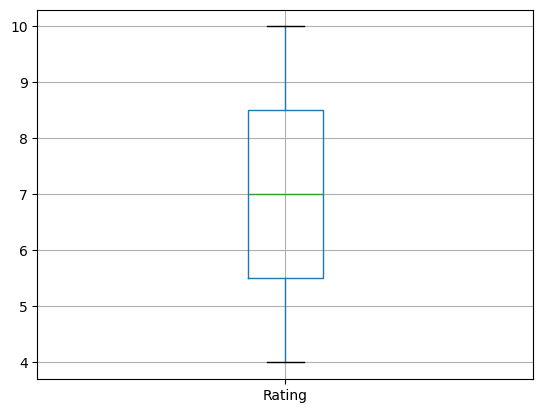

In [26]:
#controllo outlier
plt.figure()
regression_dataset.boxplot(column=['Rating'])

# Logistic Regression

In questa sezione si cambia dataset, in quanto cambia la natura del problema: si passa infatti a un problema di classificazione, in cui andrai a valutare la qualità di alcune mele destinate alla catena di supermercati per decidere quali sono le mele di qualità migliore.

La prima cosa è da fare è** importare il nuovo dataset**, ovvero apple_quality, che questa volta ti chiediamo di fare in autonomia, chiamando il dataset *classification_dataset*:

In [38]:
# codice per importare il dataset apple_quality

classification_dataset = pd.read_csv('/content/drive/MyDrive/Start2impact/Data Analysis/8 - Advanced Analytics/progetto/apple_quality.csv', encoding='windows-1254')

In [39]:
classification_dataset

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [40]:
# L'ultima riga presenta dei valori nulli, la elimino
classification_dataset = classification_dataset.iloc[:-1]

Ti suggeriamo quindi  di printare le prime 50 righe...

In [41]:
# codice per print delle prime 50 righe

classification_dataset.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


... e dei metadati delle colonne:

In [42]:
# codice per visualizzare i principali metadata del dataset apple_quality

classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Come puoi vedere, il dataset è già pulito e quasi tutte le colonne sono numeriche. L'unica a non esserlo è proprio la label, che va encodata:

In [43]:
# codice per effettuare l'enconding della label "Quality"

label_encoder = LabelEncoder()

unique_values = classification_dataset['Quality'].unique()
mapping = dict(zip(unique_values, label_encoder.fit_transform(unique_values)))
print(f"Quality")
for original_value, encoded_value in mapping.items():
    print(f"{original_value}: {encoded_value}")

classification_dataset['Quality'] = label_encoder.fit_transform(classification_dataset['Quality'])
classification_dataset.head(50)

Quality
good: 1
bad: 0


<ipython-input-43-2a5e7d103a6a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_dataset['Quality'] = label_encoder.fit_transform(classification_dataset['Quality'])


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,0
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,1
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,1
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,0
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,0


Bisogna poi ri-effettuare la divisione fra porzione di addestramento e porzione di test, usando la nomenclatura vista in precedenza:

In [44]:
# codice per splittare in train/test il dataset apple_quality

from sklearn.model_selection import train_test_split

y = classification_dataset['Quality']
X = classification_dataset.drop('Quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #ratio 80:20


Puoi finalmente usare la logistic regression per allenare il modello vero e proprio, che ti chiedo di chiamare *logistic_regressor*:

In [45]:
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

y_pred = logistic_regressor.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Una metrica che ti permette subito di valutare la bontà del modello, come saprai, è l'***F1 score***, che dovrebbe essere idealmente superiore a 0.80. Cerca anche di massimizzare la media della precision e del recall, che idealmente dovrebbero anch'essi essere superiori a 0.80:

In [46]:
from sklearn.metrics import classification_report

y_predict_test = logistic_regressor.predict(X_test)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       401
           1       0.77      0.72      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800





---


Logistic Regression: scommetto che puoi fare ancora meglio con gli F1 score ottenuti con la logistic regression, andando per esempio a capire qual è il threshold migliore da usare in maniera esplicita o andando a giocare specificatamente su alcuni iperparametri (come la penalty)

Cerco il threshold migliore e guardo come variano gli F1 score

In [47]:
from sklearn.metrics import classification_report, f1_score

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

best_threshold = 0
best_f1 = 0

for threshold in np.linspace(0, 1, 101):
    y_pred_prob = logistic_regressor.predict_proba(X_test)[:, 1]
    y_pred_thresholded = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresholded)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Best F1-score: {best_f1:.2f}")

y_pred_prob = logistic_regressor.predict_proba(X_test)[:, 1]
y_pred_thresholded = (y_pred_prob > best_threshold).astype(int)

print('/n',classification_report(y_test, y_pred_thresholded))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best threshold: 0.36
Best F1-score: 0.77
/n               precision    recall  f1-score   support

           0       0.82      0.64      0.72       401
           1       0.70      0.86      0.77       399

    accuracy                           0.75       800
   macro avg       0.76      0.75      0.75       800
weighted avg       0.76      0.75      0.75       800



Si nota che con il miglior threshold trovato lo F1 score migliora sulla label '1' a discapito dell'altra, ma le medie 'macro avg' e 'weighted avg' rimangono invariate rispetto a prima

Lo stesso avviene per la recall

Per quanto riguarda invece la precision migliora sulla label '2' a discapito dell'altra e le medie 'macro avg' e 'weighted avg' migliorano

Ora è intessante andare a "disegnare" la **confusion matrix**, che ti mostra quali sono le categorie su cui il modello che hai costruito è "bravo" e su quali no, così da eventualmente avere delle informazioni in più per migliorarlo. Prova a farlo in autonomia usando scikit-learn:

TP: 315
TN: 288
FP: 111
FN: 86


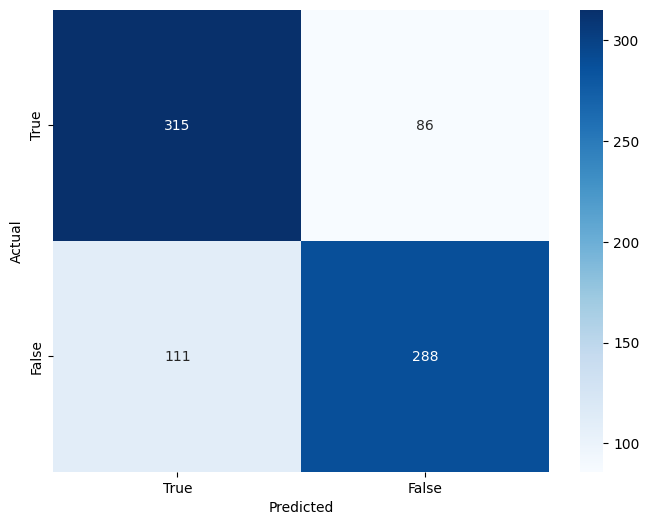

In [48]:
# codice per la confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

true_positive = cm[0][0]
print(f"TP: {true_positive}")
true_negative = cm[1][1]
print(f"TN: {true_negative}")
false_positive = cm[1][0]
print(f"FP: {false_positive}")
false_negative = cm[0][1]
print(f"FN: {false_negative}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
ratio_True_False = round((((true_positive + false_negative) / (true_positive + false_negative + false_positive + false_negative))*100),2)
print(f"Ratio True/False: {ratio_True_False}")

Ratio True/False: 67.06


# Decision Tree

**Puoi provare a usare un decision tree per capire se può migliorare le prestazioni del modello basato su logistic regression.** Generalmente, come visto durante la parte teorica del Corso, i decision tree sono più potenti, ma scoprilo costruendone uno!

Il procedimento non è dissimile da quelli usati in precedenza, quindi procedi pure al training:

In [50]:
# training del modello con un decision tree

from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       401
           1       0.82      0.80      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800





---


Decision Tree: vale quanto detto per la logistic regression, potresti per
esempio usare una max_depth custom e un po’ più alta, oppure usare un diverso criterio per valutare la suddivisione dei rami (la proprietà si chiama criterion e assume valori tipicamente fra “entropy” e “gini”, prova entrambe e vedi quale rende di più per il nostro caso d’uso)

Utilizzando un diverso criterio per la suddivione dei rami:

In [51]:
for criterion in ['gini', 'entropy']:
    decision_tree_classifier = DecisionTreeClassifier(criterion=criterion)
    decision_tree_classifier.fit(X_train, y_train)
    y_pred = decision_tree_classifier.predict(X_test)
    print(f"Criterion '{criterion}':")
    print(classification_report(y_test, y_pred))

Criterion 'gini':
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       401
           1       0.82      0.78      0.80       399

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800

Criterion 'entropy':
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       401
           1       0.83      0.80      0.82       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



Nel nostro caso il criterio migliore è l' "entropy"

E poi alla costruzione della confusion matrix:

TP: 336
TN: 320
FP: 79
FN: 65


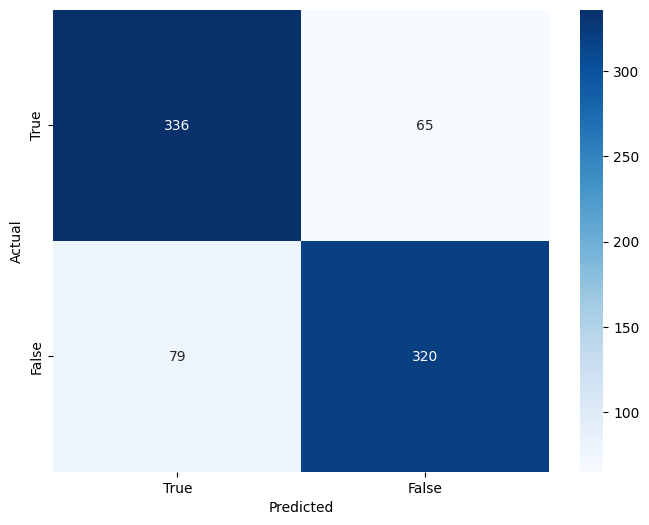

In [52]:
# confusion matrix del decision tree

cm_dt = confusion_matrix(y_test, y_pred)

true_positive = cm_dt[0][0]
print(f"TP: {true_positive}")
true_negative = cm_dt[1][1]
print(f"TN: {true_negative}")
false_positive = cm_dt[1][0]
print(f"FP: {false_positive}")
false_negative = cm_dt[0][1]
print(f"FN: {false_negative}")

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
ratio_True_False = round((((true_positive + false_negative) / (true_positive + false_negative + false_positive + false_negative))*100),2)
print(f"Ratio True/False: {ratio_True_False}")

Ratio True/False: 73.58


Quanti sono gli errori? Di più o di meno di quelli commessi dal modello con la logistic regression?

Con il decision tree ci sono meno errori rispetto alla logistic regression, il rapporto tra Positive e Negative è maggiore (71% vs 67%)

Quali sono le feature che sono state più importanti per il decision tree che hai costruito? Scoprilo con la feature importance, che ti invitiamo a calcolare e poi a printare nella cella che segue:

In [54]:
# codice per la feature importance

feature_importance = decision_tree_classifier.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print(feature_importance.round(2))

       Feature  Importance
3    Sweetness        0.19
1         Size        0.17
6     Ripeness        0.16
7      Acidity        0.13
5    Juiciness        0.11
4  Crunchiness        0.10
2       Weight        0.10
0         A_id        0.04


# K-Means Clustering

Eccoci al K-Means Clustering, il più utilizzato algoritimo tra quelli non supervisionati.

Per prima cosa bisogna eliminare la label perché, come sai, il K-Means Clustering è un algoritmo non supervisionato e non deve quindi averla:

In [55]:
clustering_dataset = classification_dataset.drop(columns=['Quality'])

In [56]:
clustering_dataset

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


Prova a trainare il modello usando l'algoritmo in oggetto, il procedimento è sempre simile a quanto visto in precedenza. Prova a settare dapprima il numero dei cluster a due (in quanto sappiamo che il dataset contiene mele buone o non buone):

In [57]:
# codice per trainare il modello con K-Means Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(clustering_dataset)

kmeans.cluster_centers_


array([[ 1.00200000e+03, -4.60942205e-01, -9.89093909e-01,
        -4.55766240e-01,  1.01644996e+00,  5.07007745e-01,
         4.82106705e-01,  1.20145362e-01],
       [ 3.00200000e+03, -5.45297944e-01, -9.90001450e-01,
        -4.85264545e-01,  9.54350598e-01,  5.17253807e-01,
         5.14529207e-01,  3.33923473e-02]])

In [58]:
classification_dataset['Cluster'] = kmeans.labels_
classification_dataset

<ipython-input-58-3bf217b4298d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_dataset['Cluster'] = kmeans.labels_


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Cluster
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1,0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1,0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1,0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1,0
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0,1
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0,1
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1,1


Effettua quindi una predizione e vedi a che qualità corrisponde la mela che hai dato in input al modello:

In [59]:
# codice per effettuare la predizione su una mela dalle carattetistiche a piacere

row_index = int(input("ID: "))

row = clustering_dataset.iloc[[row_index]]
prediction = kmeans.predict(row)

if prediction[0] == 1:
  print(f"La mela con ID {row_index} è buona")
else:
  print(f"La mela con ID {row_index} è cattiva")


ID: 20
La mela con ID 20 è cattiva


A che cluster è stata assegnata la mela, è buona o cattiva?
Che succede se invece provi a settare il numero di cluster a tre? Testa questo scenario e rifai la predizione, magari potresti scoprire che in realtà ci sono anche delle mele di qualità intermedia!

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_dataset)

kmeans.cluster_centers_

classification_dataset['Cluster'] = kmeans.labels_
classification_dataset

row_index = int(input("ID: "))

row = clustering_dataset.iloc[[row_index]]
prediction = kmeans.predict(row)

if prediction[0] == 1:
  print(f"La mela con ID {row_index} è buona")
elif prediction[0] == 0:
    print(f"La mela con ID {row_index} è cattiva")
else:
    print(f"La mela con ID {row_index} è di qualità intermedia")

<ipython-input-60-b08c3026ddfe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_dataset['Cluster'] = kmeans.labels_


# Time Series

L'ultimo tema del progetto è quello delle time series: se ci hai fatto caso, il dataset che hai utilizzato per la regressione è in realtà una time series a cui, per il problema di regressione stesso, è stata eliminata l'informazione sul tempo in quanto non utile in quello use case. Adesso è tempo di riprenderla!
In questo scenario vogliamo provare a **capire come i gross income evolvono nel tempo**, quindi prendi il dataset originale, ovvero *regression_raw_dataset* ed elimina tutte le colonne, tenendo solo "Date" e "gross income" e avendo cura di chiamare *timeseries_dataset* il nuovo dataset:

In [ ]:
# codice per costruire un nuovo dataset, partendo da regression_raw_dataset, con solo le colonne "Date" e "gross income"

timeseries_dataset = regression_raw_dataset[['Date', 'gross income']]

Dai un rapido sguardo al nuovo dataset creato, per assicurarti che sia tutto ok:

In [ ]:
timeseries_dataset.head(100)

A questo punto prova a utilizzare la **linear regression** su questa serie temporale, nello stesso modo di quanto già fatto in precedenza:

In [ ]:
# training della time series con la linear regression

from sklearn.model_selection import train_test_split

y = timeseries_dataset['gross income']
X = timeseries_dataset.drop('gross income', axis=1)

X['Date'] = pd.to_datetime(X['Date'])
X['Day'] = X['Date'].dt.day
X['Month'] = X['Date'].dt.month
X['Year'] = X['Date'].dt.year
X = X.drop('Date', axis=1) # remove original 'Date' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #ratio 80:20

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

E vai a controllare le solite metriche, cioè MSE ed MAE:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = round(mean_squared_error(y_test, y_pred),2)
MAE = round(mean_absolute_error(y_test, y_pred),2)

print('MSE =', MSE, '\nMAE =', MAE)

Ti renderai conto che probabilmente non sono così elevati come in precedenza, questo perché la regressione lineare sulle time series spesso fallisce e, come già visto nella teoria, c'è bisogno di altri modelli più perfomanti.

# Time Series con XGBoost (opzionale)

A proposito di modelli più performanti per le time series, ricordi XGBoost? Se ti va, puoi provare a impiegare quest'ultimo per costruire il modello. **Questa sezione è opzionale e non necessaria per superare il progetto.**

In [ ]:
# (BONUS) training e performance evalutation della time series con XGBoost